In [2]:
!pip install numpy pandas matplotlib impedance
!wget -q https://github.com/wesleykchang/ECS_battery_diagnostics/raw/main/example_EIS.csv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.0 MB/s eta 0:00:00


The circuit parameters are:  
Circuit string: R_0-p(R_1,C_0)-p(R_2,C_1)-Wo_1
Fit: True

Initial guesses:
    R_0 = 1.00e-01 [Ohm]
    R_1 = 1.00e-01 [Ohm]
    C_0 = 1.00e-01 [F]
    R_2 = 1.00e-01 [Ohm]
    C_1 = 1.00e-01 [F]
  Wo_1_0 = 2.00e-01 [Ohm]
  Wo_1_1 = 2.00e-01 [sec]

Fit parameters:
    R_0 = 1.60e-02  (+/- 3.70e-04) [Ohm]
    R_1 = 5.79e-03  (+/- 6.58e-04) [Ohm]
    C_0 = 2.09e-01  (+/- 4.65e-02) [F]
    R_2 = 8.96e-03  (+/- 6.50e-04) [Ohm]
    C_1 = 3.31e+00  (+/- 6.31e-01) [F]
  Wo_1_0 = 1.44e-01  (+/- 5.40e-01) [Ohm]
  Wo_1_1 = 1.31e+03  (+/- 9.79e+03) [sec]



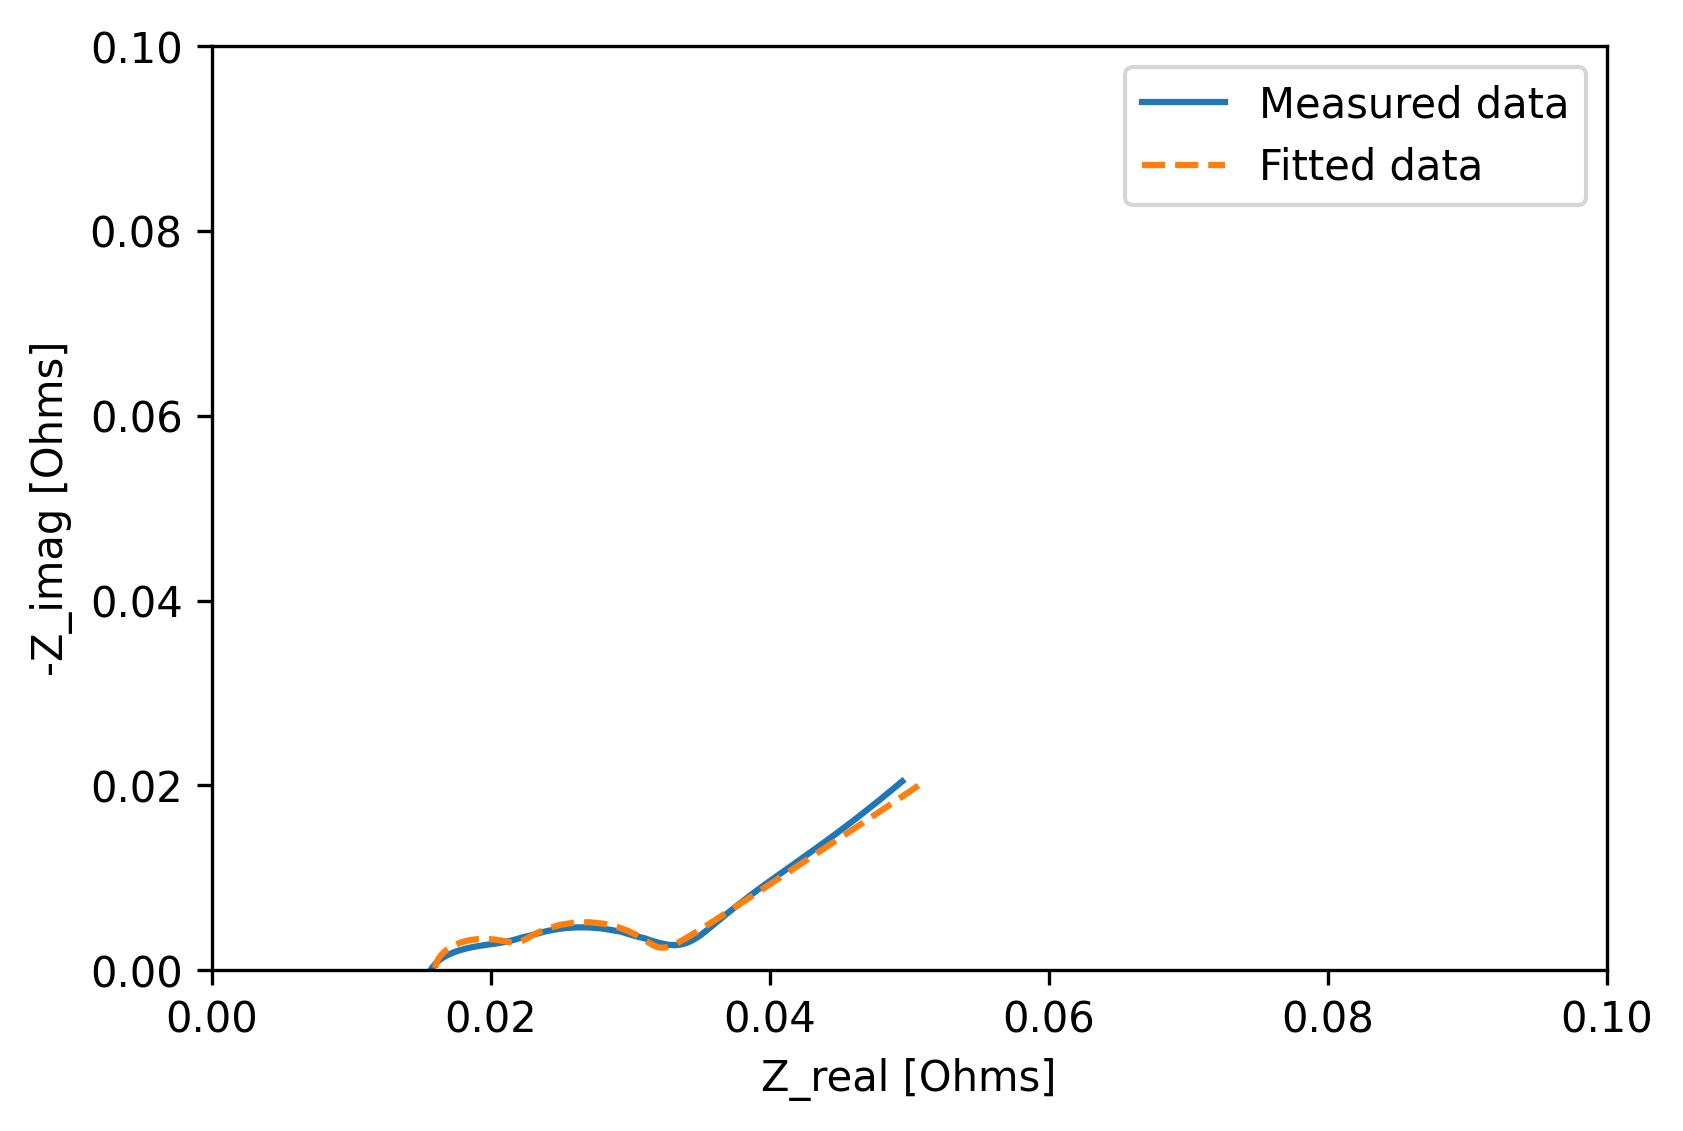

In [3]:
'''The impedance module uses scipy non-linear least squares regression to fit measured data to a circuit model'''

'''First, import all packages. Documentation for the impedance module can be found here: https://impedancepy.readthedocs.io/en/latest/getting-started.html'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit

file_dir = "/content/"

filenames = ['example_EIS.csv'] #Biologic EIS file
fig1 = plt.figure(dpi=300, figsize = (6,4))

ax = fig1.add_subplot(111)

for f in filenames:
    frequencies, Z = preprocessing.readCSV(file_dir+f) #Use the readBiologic function to import the Biologic .mpt file

    #Define the circuit. Here, we assume each electrode behaves like a resistor and capacitor in parallel.
    #Lastly, the Warburg models the low frequency diffusion behavior
    circuit = 'R_0-p(R_1,C_0)-p(R_2,C_1)-Wo_1'

    #The initial guesses are used for the regression model.
    initial_guess = [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2]

    circuit = CustomCircuit(circuit, initial_guess=initial_guess)
    circuit.fit(frequencies, Z)
    print('The circuit parameters are: ', circuit)

    Z_fit = circuit.predict(frequencies)

    #Plot the real and imaginary components of the impedance
    ax.plot(Z.real, -Z.imag, label='Measured data')
    ax.plot(Z_fit.real, -Z_fit.imag, label='Fitted data',ls = 'dashed') #Plots the fit

#It's standard practice to plot EIS with equal x and y-axis ranges, as the real and imag components are linked and scaled similarly
ax.set_xlim(0, 0.1)
ax.set_ylim(0, 0.1)
ax.set_xlabel('Z_real [Ohms]')
ax.set_ylabel('-Z_imag [Ohms]')
ax.legend(loc='best')
plt.show()
